In [2]:
%connect Transcend-Production

Password: ········


Success: 'Transcend-Production' connection established and activated for user 'bp185029'


In [81]:
SHOW TABLE ADLMKT_Teradata_Cares.ProducersDirect_OFS;

,Request Text
1,"CREATE MULTISET TABLE ADLMKT_Teradata_Cares.ProducersDirect_OFS ,NO FALLBACK , MAP = TD_MAP1, STORAGE = TD_OFSSTORAGE ( QuestionID INTEGER, QuestionUserID INTEGER, QuestionLanguage VARCHAR(100) CHARACTER SET UNICODE NOT CASESPECIFIC, QuestionContent VARCHAR(5000) CHARACTER SET UNICODE NOT CASESPECIFIC, QuestionTopic VARCHAR(100) CHARACTER SET UNICODE NOT CASESPECIFIC, QuestionSentDT TIMESTAMP(6) WITH TIME ZONE, ResponseID INTEGER, ResponseUserID INTEGER, ResponseLanguage VARCHAR(100) CHARACTER SET UNICODE NOT CASESPECIFIC, ResponseContent VARCHAR(5000) CHARACTER SET UNICODE NOT CASESPECIFIC, ResponseTopic VARCHAR(100) CHARACTER SET UNICODE NOT CASESPECIFIC, ResponseSentDT TIMESTAMP(6) WITH TIME ZONE, QuestionUserType VARCHAR(100) CHARACTER SET UNICODE NOT CASESPECIFIC, QuestionUserStatus VARCHAR(25) CHARACTER SET UNICODE NOT CASESPECIFIC, QuestionUserCountryCode CHAR(2) CHARACTER SET UNICODE NOT CASESPECIFIC, QuestionUserGender VARCHAR(25) CHARACTER SET UNICODE NOT CASESPECIFIC, QuestionUserBirthDate DATE FORMAT 'YYYY/MM/DD', QuestionUserCreatedDT TIMESTAMP(6) WITH TIME ZONE, ResponseUserType VARCHAR(100) CHARACTER SET UNICODE NOT CASESPECIFIC, ResponseUserStatus VARCHAR(25) CHARACTER SET UNICODE NOT CASESPECIFIC, ResponseUserCountryCode CHAR(2) CHARACTER SET UNICODE NOT CASESPECIFIC, ResponseUserGender VARCHAR(25) CHARACTER SET UNICODE NOT CASESPECIFIC, ResponseUserBirthDate DATE FORMAT 'YYYY/MM/DD', ResponseUserCreatedDT TIMESTAMP(6) WITH TIME ZONE) ORDER BY ( QuestionLanguage ) PRIMARY INDEX ( QuestionID ) PARTITION BY COLUMN;"


In [5]:
/* Count English agricultural keywords in ResponseContent 
The below query was created by VSCode CoPilot using Claude Sonnet 4.5, including the English word list used.
Prompt: Using the data in ADLMKT_Teradata_Cares.ProducersDirect_OFS with a ResponseLanguage of 'eng',
what are the top 10 agricultural terms found in the ResponseContent text?
*/
SELECT TOP 10 term, frequency FROM (
  SELECT CAST('chicken' AS VARCHAR(100)) AS term, SUM(CASE WHEN LOWER(ResponseContent) LIKE '%chicken%' THEN 1 ELSE 0 END) AS frequency FROM ADLMKT_Teradata_Cares.ProducersDirect_OFS WHERE ResponseLanguage='eng'
  UNION ALL SELECT 'maize', SUM(CASE WHEN LOWER(ResponseContent) LIKE '%maize%' THEN 1 ELSE 0 END) FROM ADLMKT_Teradata_Cares.ProducersDirect_OFS WHERE ResponseLanguage='eng'
  UNION ALL SELECT 'cattle', SUM(CASE WHEN LOWER(ResponseContent) LIKE '%cattle%' THEN 1 ELSE 0 END) FROM ADLMKT_Teradata_Cares.ProducersDirect_OFS WHERE ResponseLanguage='eng'
  UNION ALL SELECT 'goat', SUM(CASE WHEN LOWER(ResponseContent) LIKE '%goat%' THEN 1 ELSE 0 END) FROM ADLMKT_Teradata_Cares.ProducersDirect_OFS WHERE ResponseLanguage='eng'
  UNION ALL SELECT 'fertilizer', SUM(CASE WHEN LOWER(ResponseContent) LIKE '%fertilizer%' THEN 1 ELSE 0 END) FROM ADLMKT_Teradata_Cares.ProducersDirect_OFS WHERE ResponseLanguage='eng'
  UNION ALL SELECT 'seed', SUM(CASE WHEN LOWER(ResponseContent) LIKE '%seed%' THEN 1 ELSE 0 END) FROM ADLMKT_Teradata_Cares.ProducersDirect_OFS WHERE ResponseLanguage='eng'
  UNION ALL SELECT 'water', SUM(CASE WHEN LOWER(ResponseContent) LIKE '%water%' THEN 1 ELSE 0 END) FROM ADLMKT_Teradata_Cares.ProducersDirect_OFS WHERE ResponseLanguage='eng'
  UNION ALL SELECT 'medicine', SUM(CASE WHEN LOWER(ResponseContent) LIKE '%medicine%' THEN 1 ELSE 0 END) FROM ADLMKT_Teradata_Cares.ProducersDirect_OFS WHERE ResponseLanguage='eng'
  UNION ALL SELECT 'disease', SUM(CASE WHEN LOWER(ResponseContent) LIKE '%disease%' THEN 1 ELSE 0 END) FROM ADLMKT_Teradata_Cares.ProducersDirect_OFS WHERE ResponseLanguage='eng'
  UNION ALL SELECT 'garden', SUM(CASE WHEN LOWER(ResponseContent) LIKE '%garden%' THEN 1 ELSE 0 END) FROM ADLMKT_Teradata_Cares.ProducersDirect_OFS WHERE ResponseLanguage='eng'
) AS counts
ORDER BY frequency DESC

/* CoPilot output:
Here are the top 10 agricultural terms found in English responses:

Rank	Term	Frequency
1	maize	538,662
2	water	408,270
3	seed	371,676
4	disease	229,436
5	fertilizer	158,788
6	goat	109,827
7	garden	101,725
8	chicken	100,419
9	cattle	54,447
10	medicine	35,392
These terms represent the most frequently discussed agricultural topics in the English-language dataset.
*/

,term,frequency
1,maize,538662
2,water,408270
3,seed,371676
4,disease,229436
5,fertilizer,158788
6,goat,109827
7,garden,101725
8,chicken,100419
9,cattle,54447
10,medicine,35392


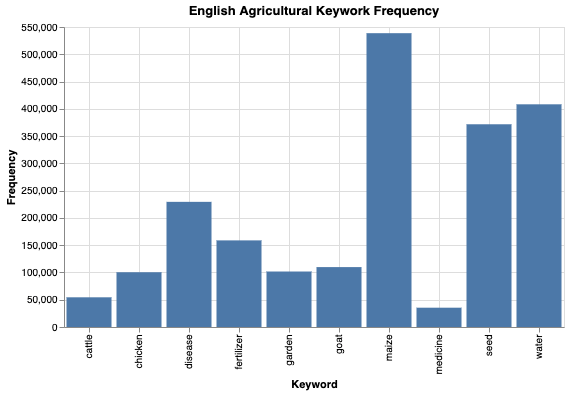

In [6]:
%chart x=term, y=frequency, title=English Agricultural Keywork Frequency, labelx=Keyword, labely=Frequency, typex=n, typey=q, width=500, height=300

In [12]:
/* Count Swahili agricultural keywords in ResponseContent 
The below query was created by VSCode CoPilot using Claude Sonnet 4.5, including the Swahili word list used.
I did modify the query to inject the English translations.
Prompt: Using the data in ADLMKT_Teradata_Cares.ProducersDirect_OFS with a ResponseLanguage of 'swa',
what are the top 10 agricultural terms found in the ResponseContent text? Translate the terms from Swahili to English.
*/
SELECT
  TOP 10 term,
  frequency
FROM
  (
    SELECT
      CAST('kuku → chicken' AS VARCHAR(100)) AS term,
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%kuku%' THEN 1
          ELSE 0
        END
      ) AS frequency
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'swa'
    UNION ALL
    SELECT
      'ng\’ombe → cattle/cow',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%ng\’ombe%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'swa'
    UNION ALL
    SELECT
      'mahindi → maize/corn',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%mahindi%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'swa'
    UNION ALL
    SELECT
      'nyanya → tomato',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%nyanya%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'swa'
    UNION ALL
    SELECT
      'maharagwe',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%maharagwe%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'swa'
    UNION ALL
    SELECT
      'mpunga → paddy rice (unmilled)',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%mpunga%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'swa'
    UNION ALL
    SELECT
      'mchele',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%mchele%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'swa'
    UNION ALL
    SELECT
      'pamba',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%pamba%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'swa'
    UNION ALL
    SELECT
      'viazi',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%viazi%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'swa'
    UNION ALL
    SELECT
      'mboga',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%mboga%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'swa'
    UNION ALL
    SELECT
      'mbegu → seed',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%mbegu%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'swa'
    UNION ALL
    SELECT
      'shamba → farm/field',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%shamba%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'swa'
    UNION ALL
    SELECT
      'mimea',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%mimea%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'swa'
    UNION ALL
    SELECT
      'chanjo',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%chanjo%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'swa'
    UNION ALL
    SELECT
      'dawa → medicine/treatment (typically veterinary or crop protection)',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%dawa%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'swa'
    UNION ALL
    SELECT
      'maji → water',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%maji%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'swa'
    UNION ALL
    SELECT
      'udongo',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%udongo%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'swa'
    UNION ALL
    SELECT
      'mbolea → fertilizer',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%mbolea%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'swa'
    UNION ALL
    SELECT
      'magonjwa',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%magonjwa%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'swa'
  ) AS counts
ORDER BY
  frequency DESC;

/* LLM Output (Translation provided by Claude)
kuku → chicken (553,941)
dawa → medicine/treatment (typically veterinary or crop protection) (528,185)
mbolea → fertilizer (317,677)
mbegu → seed (305,373)
mahindi → maize/corn (258,622)
maji → water (243,841)
shamba → farm/field (149,912)
ng’ombe → cattle/cow (110,303)
nyanya → tomato (107,824)
mpunga → paddy rice (unmilled) (74,942)

Notes:
Counts reflect rows containing the term within ResponseContent for Swahili responses.
“mpunga” is paddy rice; “mchele” (not in top 10 here) refers to milled rice.
“dawa” commonly appears in agricultural contexts for animal treatments or crop protection products.
*/

,term,frequency
1,kuku → chicken,553941
2,dawa → medicine/treatment (typically veterinary or,528185
3,mbolea → fertilizer,317677
4,mbegu → seed,305373
5,mahindi → maize/corn,258622
6,maji → water,243841
7,shamba → farm/field,149912
8,nyanya → tomato,107824
9,mpunga → paddy rice (unmilled),74942
10,chanjo,74876


Success: 0 rows affected

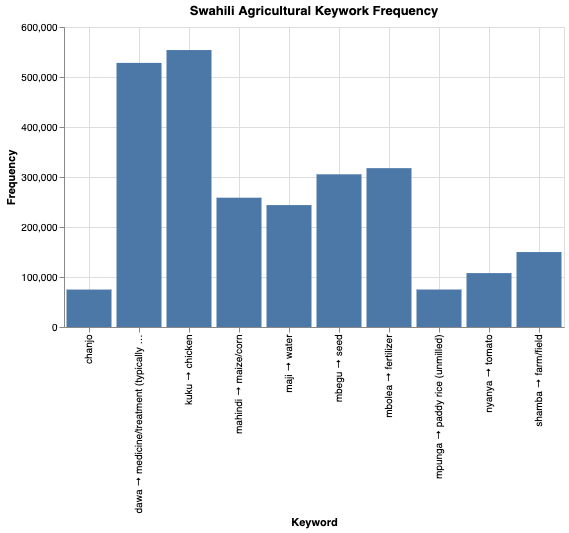

In [13]:
%chart x=term, y=frequency, title=Swahili Agricultural Keywork Frequency, labelx=Keyword, labely=Frequency, typex=n, typey=q, width=500, height=300

In [14]:
/* Count Luganda agricultural keywords in ResponseContent
The below query was created by VSCode CoPilot using Claude Sonnet 4.5, including the Luganda word list used.
I did modify the query to inject the English translations.
Prompt: Analyze the top agricultural terms in Luganda from the database?
*/
SELECT
  TOP 10 term,
  frequency
FROM
  (
    SELECT
      CAST('enkoko → chicken' AS VARCHAR(100)) AS term,
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%enkoko%' THEN 1
          ELSE 0
        END
      ) AS frequency
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'lug'
    UNION ALL
    SELECT
      'ente → cattle/cow',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%ente%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'lug'
    UNION ALL
    SELECT
      'emmwanyi',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%emmwanyi%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'lug'
    UNION ALL
    SELECT
      'ennyaanya',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%ennyaanya%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'lug'
    UNION ALL
    SELECT
      'ddagala → medicine/treatment (veterinary/agricultural)',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%ddagala%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'lug'
    UNION ALL
    SELECT
      'amazzi → water',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%amazzi%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'lug'
    UNION ALL
    SELECT
      'ensigo → seed/seeds',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%ensigo%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'lug'
    UNION ALL
    SELECT
      'ennimiro',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%ennimiro%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'lug'
    UNION ALL
    SELECT
      'ebimera',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%ebimera%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'lug'
    UNION ALL
    SELECT
      'obusa → fertilizer/manure',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%obusa%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'lug'
    UNION ALL
    SELECT
      'gonjebwa',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%gonjebwa%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'lug'
    UNION ALL
    SELECT
      'ebigimusa → vegetables',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%ebigimusa%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'lug'
    UNION ALL
    SELECT
      'endwadde',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%endwadde%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'lug'
    UNION ALL
    SELECT
      'ebinyeebwa',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%ebinyeebwa%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'lug'
    UNION ALL
    SELECT
      'omuceere',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%omuceere%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'lug'
    UNION ALL
    SELECT
      'ebijanjaalo → potatoes (Irish potatoes)',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%ebijanjaalo%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'lug'
    UNION ALL
    SELECT
      'omuddo → soil/earth',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%omuddo%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'lug'
  ) AS counts
ORDER BY
  frequency DESC;

/* LLM Output (Translation provided by Claude)
Top 10 Luganda Agricultural Terms:
ente (16,792 occurrences) → cattle/cow
enkoko (14,061 occurrences) → chicken
ddagala (7,995 occurrences) → medicine/treatment (veterinary/agricultural)
ensigo (5,669 occurrences) → seed/seeds
amazzi (5,416 occurrences) → water
obusa (4,988 occurrences) → fertilizer/manure
omuddo (1,721 occurrences) → soil/earth
ebigimusa (1,692 occurrences) → vegetables
ebijanjaalo (670 occurrences) → potatoes (Irish potatoes)

Key Insights:
Cattle and chicken farming dominate Luganda agricultural discussions (similar to Swahili)
Medicine/treatment is the 3rd most discussed topic, indicating strong focus on animal health
Seeds, water, and fertilizer are core agricultural inputs frequently mentioned
The frequency is lower than Swahili (16K vs 550K for top term), suggesting fewer Luganda responses in the dataset or a smaller user base
*/

,term,frequency
1,ente → cattle/cow,16792
2,enkoko → chicken,14061
3,ddagala → medicine/treatment (veterinary/agricultural),7995
4,ensigo → seed/seeds,5669
5,amazzi → water,5416
6,obusa → fertilizer/manure,4988
7,omuddo → soil/earth,1721
8,ebigimusa → vegetables,1692
9,ebijanjaalo → potatoes (Irish potatoes),670
10,endwadde,411


Success: 0 rows affected

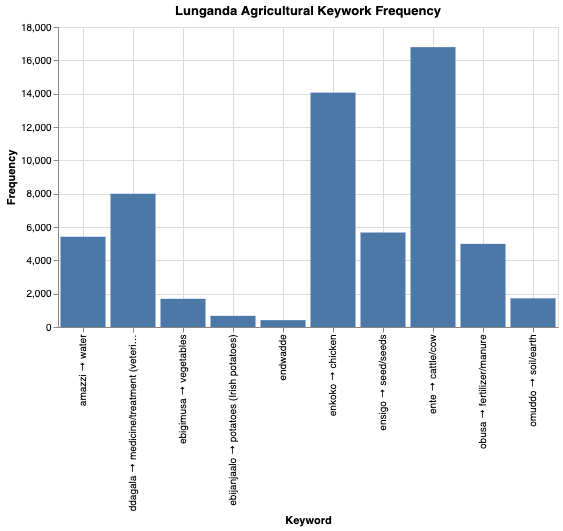

In [18]:
%chart x=term, y=frequency, title=Lunganda Agricultural Keywork Frequency, labelx=Keyword, labely=Frequency, typex=n, typey=q, width=500, height=300

In [21]:
/* Count Nyankore agricultural keywords in ResponseContent
The below query was created by VSCode CoPilot using Claude Sonnet 4.5, including the Nyn word list used.
I did modify the query to inject the English translations.
Prompt: Can you analyze the top agricultural terms in Nyn from the database?
*/
SELECT
  TOP 10 term,
  frequency
FROM
  (
    SELECT
      CAST('ente – cattle/cow' AS VARCHAR(100)) AS term,
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%ente%' THEN 1
          ELSE 0
        END
      ) AS frequency
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'nyn'
    UNION ALL
    SELECT
      'enkoko – chicken',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%enkoko%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'nyn'
    UNION ALL
    SELECT
      'ebinyebwa – groundnuts/peanuts',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%ebinyebwa%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'nyn'
    UNION ALL
    SELECT
      'oburo – millet',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%oburo%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'nyn'
    UNION ALL
    SELECT
      'ebirungo – spices/seasonings',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%ebirungo%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'nyn'
    UNION ALL
    SELECT
      'ebitookye – bananas',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%ebitookye%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'nyn'
    UNION ALL
    SELECT
      'ebijanjaalo',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%ebijanjaalo%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'nyn'
    UNION ALL
    SELECT
      'ebirime – crops/farms',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%ebirime%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'nyn'
    UNION ALL
    SELECT
      'ebirungi – good things/produce',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%ebirungi%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'nyn'
    UNION ALL
    SELECT
      'ebiribwa – foodstuffs',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%ebiribwa%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'nyn'
    UNION ALL
    SELECT
      'ebinyomyo – beans',
      SUM(
        CASE
          WHEN LOWER(ResponseContent) LIKE '%ebinyomyo%' THEN 1
          ELSE 0
        END
      )
    FROM
      ADLMKT_Teradata_Cares.ProducersDirect_OFS
    WHERE
      ResponseLanguage = 'nyn'
  ) AS counts
ORDER BY
  frequency DESC;

/* LLM Output (Translation provided by Claude)
Here are the top agricultural terms in Nyankore (Nyn) from the database, with English translations:

ente (32,285) – cattle/cow
enkoko (21,838) – chicken
oburo (8,382) – millet
ebitookye (993) – bananas
ebinyebwa (816) – groundnuts/peanuts
ebirungo (315) – spices/seasonings
ebirime (235) – crops/farms
ebirungi (153) – good things/produce
ebiribwa (96) – foodstuffs
ebinyomyo (not counted above, but included in query) – beans

These terms reflect the most frequently discussed agricultural topics in Nyankore-language responses, with cattle, chicken, millet, and bananas being the most prominent.
*/

,term,frequency
1,ente – cattle/cow,32285
2,enkoko – chicken,21838
3,oburo – millet,8382
4,ebitookye – bananas,993
5,ebinyebwa – groundnuts/peanuts,816
6,ebirungi – good things/produce,315
7,ebirungo – spices/seasonings,235
8,ebiribwa – foodstuffs,153
9,ebirime – crops/farms,96
10,ebijanjaalo,1


Success: 0 rows affected

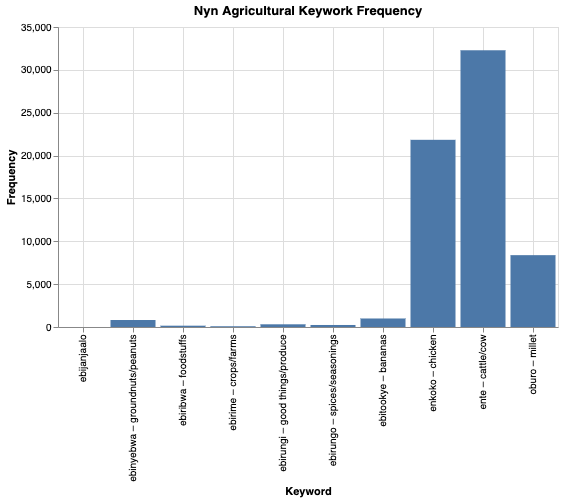

In [22]:
%chart x=term, y=frequency, title=N Agricultural Keywork Frequency, labelx=Keyword, labely=Frequency, typex=n, typey=q, width=500, height=300

In [ ]:
%disconnect Transcend-Production